In [1]:
import pandas as pd
pd.set_option('display.expand_frame_repr', False)
import json
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("ggplot")
from matplotlib.pyplot import figure

In [2]:
table_2 = pd.read_csv("./Kickstarter001.csv")
table_1 = pd.read_csv ("./Kickstarter.csv")
table_3 = pd.read_csv ("./Kickstarter002.csv")
table_4 = pd.read_csv ("./Kickstarter003.csv")
table_5 = pd.read_csv ("./Kickstarter056.csv")

In [45]:
data = pd.concat([table_1, table_2, table_3, table_4, table_5], axis=0)
data.head(5)

,backers_count,blurb,category,converted_pledged_amount,country,country_displayable_name,created_at,creator,currency,currency_symbol,...,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type
0,6,Das Good Inc goal is to make cooking easy and ...,"{""id"":312,""name"":""Restaurants"",""slug"":""food/re...",266,US,the United States,1534710982,"{""id"":407371466,""name"":""Anh Vongbandith"",""slug...",USD,$,...,help-get-das-good-seasonings-and-sauces-to-sup...,https://www.kickstarter.com/discover/categorie...,False,False,failed,1549236382,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",266.0,international
1,2,A web series about the soul crushing exercise ...,"{""id"":33,""name"":""Webseries"",""slug"":""film & vid...",260,US,the United States,1480480200,"{""id"":1660574317,""name"":""Blakely Thornton"",""is...",USD,$,...,the-applicant-interviews-are-hell,https://www.kickstarter.com/discover/categorie...,False,False,failed,1485351921,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",260.0,domestic
2,3,"A photographic essay on the historic, incompar...","{""id"":280,""name"":""Photobooks"",""slug"":""photogra...",185,US,the United States,1478033617,"{""id"":125092605,""name"":""David Baez"",""is_regist...",USD,$,...,pictures-of-veracruz,https://www.kickstarter.com/discover/categorie...,False,False,failed,1479302424,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",185.0,international
3,2,A romantic comedy mini series following a self...,"{""id"":33,""name"":""Webseries"",""slug"":""film & vid...",35,US,the United States,1516675034,"{""id"":280516405,""name"":""Jordan Lakomiak"",""slug...",USD,$,...,5-reasons-to-hate-christmas,https://www.kickstarter.com/discover/categorie...,False,False,failed,1525977197,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",35.0,domestic
4,8,The Drums of Atlant is an original science fic...,"{""id"":301,""name"":""Science Fiction"",""slug"":""fil...",261,US,the United States,1554695036,"{""id"":1081096082,""name"":""AsteronX"",""is_registe...",USD,$,...,the-drums-of-atlant,https://www.kickstarter.com/discover/categorie...,False,False,failed,1558056215,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",261.0,domestic


In [46]:
df = data[['id','backers_count','category','country_displayable_name','location','created_at', 'launched_at', 'deadline','currency','pledged','goal','state'] ]
df.head()

,id,backers_count,category,country_displayable_name,location,created_at,launched_at,deadline,currency,pledged,goal,state
0,1432554512,6,"{""id"":312,""name"":""Restaurants"",""slug"":""food/re...",the United States,"{""id"":2471217,""name"":""Philadelphia"",""slug"":""ph...",1534710982,1544052381,1549236381,USD,266.0,75000.0,failed
1,1925377347,2,"{""id"":33,""name"":""Webseries"",""slug"":""film & vid...",the United States,"{""id"":2442047,""name"":""Los Angeles"",""slug"":""los...",1480480200,1482759921,1485351921,USD,260.0,6000.0,failed
2,1088749014,3,"{""id"":280,""name"":""Photobooks"",""slug"":""photogra...",the United States,"{""id"":150695,""name"":""Veracruz"",""slug"":""veracru...",1478033617,1478089224,1479302424,USD,185.0,1200.0,failed
3,1876427386,2,"{""id"":33,""name"":""Webseries"",""slug"":""film & vid...",the United States,"{""id"":2489314,""name"":""Savannah"",""slug"":""savann...",1516675034,1523385196,1525977196,USD,35.0,10000.0,failed
4,671662806,8,"{""id"":301,""name"":""Science Fiction"",""slug"":""fil...",the United States,"{""id"":2490383,""name"":""Seattle"",""slug"":""seattle...",1554695036,1555464215,1558056215,USD,261.0,20000.0,failed


In [47]:
def category_func(x):
    if "parent_name" in json.loads(x):
        return json.loads(x)["parent_name"]
    else:
        return np.nan

df["sub category"] = df["category"].apply(lambda x: json.loads(x)["name"])
df["parent category"] = df["category"].apply(category_func)
 

/Users/shwetasharma1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/shwetasharma1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [48]:
df.sample(100)

,id,backers_count,category,country_displayable_name,location,created_at,launched_at,deadline,currency,pledged,goal,state,sub category,parent category
1285,1362308892,0,"{""id"":318,""name"":""Faith"",""slug"":""music/faith"",...",the United States,"{""id"":2512937,""name"":""Waco"",""slug"":""waco-tx"",""...",1413751634,1414680432,1417276032,USD,0.0,6000.0,failed,Faith,Music
1455,1531362971,1,"{""id"":272,""name"":""Mobile Games"",""slug"":""games/...",Spain,"{""id"":766273,""name"":""Madrid"",""slug"":""madrid-ma...",1445974403,1446188062,1448783662,EUR,1.0,30000.0,failed,Mobile Games,Games
2279,1085972602,28,"{""id"":258,""name"":""Architecture"",""slug"":""design...",Canada,"{""id"":3534,""name"":""Montreal"",""slug"":""montreal-...",1502843629,1510620727,1514508727,CAD,1541.0,45000.0,failed,Architecture,Design
577,468999943,42,"{""id"":285,""name"":""Plays"",""slug"":""theater/plays...",the United States,"{""id"":2379574,""name"":""Chicago"",""slug"":""chicago...",1502674971,1502752817,1507936817,USD,2093.0,2000.0,successful,Plays,Theater
2464,1094084857,410,"{""id"":313,""name"":""Small Batch"",""slug"":""food/sm...",the United States,"{""id"":2514815,""name"":""Washington"",""slug"":""wash...",1475181754,1485867822,1489320222,USD,50267.0,10000.0,successful,Small Batch,Food
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1874,1360536469,28,"{""id"":302,""name"":""Thrillers"",""slug"":""film & vi...",the United States,"{""id"":2442047,""name"":""Los Angeles"",""slug"":""los...",1413581934,1414691841,1417287441,USD,1916.0,22000.0,failed,Thrillers,Film & Video
3586,856328571,3,"{""id"":21,""name"":""Digital Art"",""slug"":""art/digi...",the United States,"{""id"":2487889,""name"":""San Diego"",""slug"":""san-d...",1449877457,1449881166,1450140366,USD,15.0,1000.0,failed,Digital Art,Art
2642,542562325,6,"{""id"":23,""name"":""Painting"",""slug"":""art/paintin...",Denmark,"{""id"":554890,""name"":""Copenhagen"",""slug"":""copen...",1431259635,1431892029,1434484029,DKK,3050.0,15000.0,failed,Painting,Art
3433,752497780,0,"{""id"":21,""name"":""Digital Art"",""slug"":""art/digi...",Canada,"{""id"":9848,""name"":""Victoria"",""slug"":""victoria-...",1494752985,1494879179,1497532800,CAD,0.0,5000.0,failed,Digital Art,Art


In [66]:
df["created_at"] = df["created_at"].apply(lambda x: datetime.fromtimestamp(x).strftime('%Y-%m-%d'))
df["launched_at"] = df["launched_at"].apply(lambda x: datetime.fromtimestamp(x).strftime('%Y-%m-%d'))
df["deadline"] = df["deadline"].apply(lambda x: datetime.fromtimestamp(x).strftime('%Y-%m-%d'))
df.sample(10)

/Users/shwetasharma1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/shwetasharma1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/shwetasharma1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

,id,backers_count,category,country_displayable_name,location,created_at,launched_at,deadline,currency,pledged,goal,state,sub category,parent category,created_to_launch,launch_to_deadline
1568,572308162,3,"{""id"":282,""name"":""Festivals"",""slug"":""theater/f...",Sweden,"{""id"":904350,""name"":""Skellefteå"",""slug"":""skell...",2014-10-07,2014-10-29,2014-12-28,SEK,605.0,43000.0,failed,Festivals,Theater,1919894,5187600
2049,308420850,71,"{""id"":254,""name"":""Performances"",""slug"":""dance/...",the United States,"{""id"":2490383,""name"":""Seattle"",""slug"":""seattle...",2014-09-11,2014-09-28,2014-11-08,USD,6699.0,5500.0,successful,Performances,Dance,1475818,3546000
24,1730199477,0,"{""id"":312,""name"":""Restaurants"",""slug"":""food/re...",the United States,"{""id"":2427032,""name"":""Indianapolis"",""slug"":""in...",2016-02-27,2016-03-05,2016-04-04,USD,0.0,10000.0,failed,Restaurants,Food,581564,2588400
2075,1347037943,7,"{""id"":24,""name"":""Performance Art"",""slug"":""art/...",the United Kingdom,"{""id"":36934,""name"":""Tamworth"",""slug"":""tamworth...",2013-08-24,2013-08-26,2013-09-19,GBP,544.0,1500.0,failed,Performance Art,Art,142426,2073600
456,799687702,26,"{""id"":241,""name"":""Metal"",""slug"":""music/metal"",...",New Zealand,"{""id"":2349663,""name"":""Napier"",""slug"":""napier-n...",2013-11-13,2013-11-26,2013-12-30,NZD,1207.0,1200.0,successful,Metal,Music,1120950,2930846
3556,127493800,0,"{""id"":38,""name"":""Electronic Music"",""slug"":""mus...",Spain,"{""id"":29370606,""name"":""España"",""slug"":""espana-...",2016-06-03,2016-06-03,2016-07-13,EUR,0.0,3000.0,canceled,Electronic Music,Music,4006,3456000
1958,2142245747,2,"{""id"":39,""name"":""Hip-Hop"",""slug"":""music/hip-ho...",the United States,"{""id"":2357024,""name"":""Atlanta"",""slug"":""atlanta...",2016-01-12,2016-01-12,2016-02-11,USD,6.0,5000.0,failed,Hip-Hop,Music,1469,2592000
302,75602899,22,"{""id"":45,""name"":""Art Books"",""slug"":""publishing...",the United States,"{""id"":2479651,""name"":""Redmond"",""slug"":""redmond...",2013-12-23,2015-07-10,2015-08-09,USD,875.0,6285.0,failed,Art Books,Publishing,48683675,2592000
3539,904692904,0,"{""id"":21,""name"":""Digital Art"",""slug"":""art/digi...",Japan,"{""id"":1109614,""name"":""Ishinomaki-shi"",""slug"":""...",2018-02-15,2018-02-23,2018-04-24,JPY,0.0,5000000.0,failed,Digital Art,Art,687318,5180400
1178,302150839,126,"{""id"":253,""name"":""Webcomics"",""slug"":""comics/we...",the United Kingdom,"{""id"":36424,""name"":""Stratford-upon-Avon"",""slug...",2015-02-05,2015-09-02,2015-10-04,GBP,4586.0,2500.0,successful,Webcomics,Comics,18059682,2764674


In [67]:
df["created_at"]=pd.to_datetime(df["created_at"])
df["launched_at"]=pd.to_datetime(df["launched_at"])
df["deadline"]=pd.to_datetime(df["deadline"])

/Users/shwetasharma1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/shwetasharma1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/shwetasharma1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [68]:
def state_proportion(data):
    state_count = data.groupby(["state"]).size()
    return state_count

In [69]:
state_proportion(df).reset_index(name = "counts")

,state,counts
0,canceled,825
1,failed,6446
2,live,411
3,successful,10685
4,suspended,65


In [70]:
a = state_proportion(df).reset_index(name = "counts")

In [71]:
x = np.array(a.iloc[:,0])
y = np.array(a.iloc[:,1])
total = y.sum()
y/total

array([0.04475911, 0.34971788, 0.02229818, 0.57969835, 0.00352648])

Text(0.5, 1.0, 'Number of kickstarters according to different status')

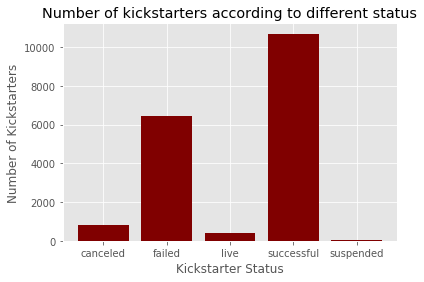

In [72]:
#status in numbers
plt.bar(x,y, color = "maroon")

plt.xlabel("Kickstarter Status") 
plt.ylabel("Number of Kickstarters") 
plt.title("Number of kickstarters according to different status")

Text(0.0, 1.0, "Kickstarters' status proportions")

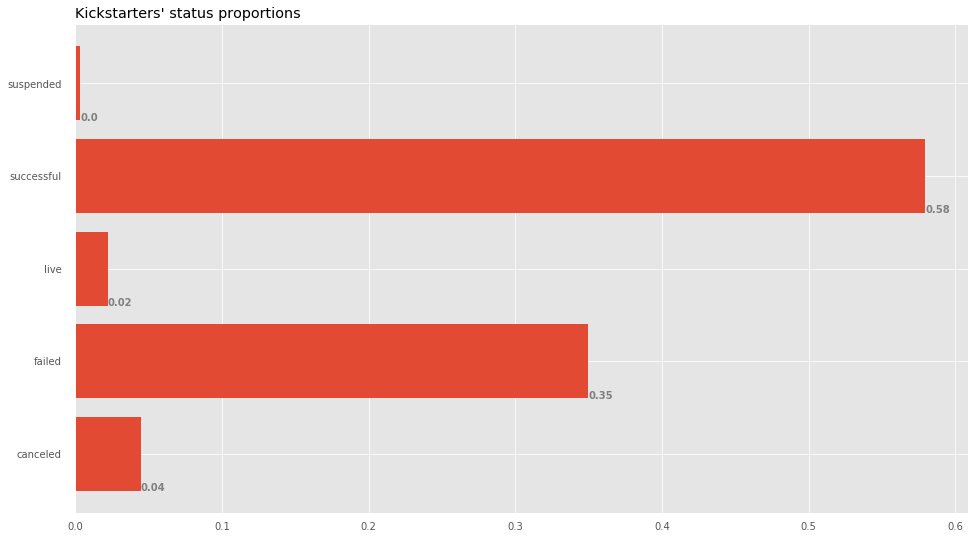

In [73]:
# status in terms of percentages
fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(x, y/total)
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_tick_params(pad = 5) 
ax.yaxis.set_tick_params(pad = 10)
for i in ax.patches: 
    plt.text(i.get_width(), i.get_y(),  
             str(round((i.get_width()), 2)), 
             fontsize = 10, fontweight ='bold', 
             color ='grey')
    
ax.set_title("Kickstarters' status proportions", 
             loc ='left', ) 

In [74]:
df.head()

,id,backers_count,category,country_displayable_name,location,created_at,launched_at,deadline,currency,pledged,goal,state,sub category,parent category,created_to_launch,launch_to_deadline
0,1432554512,6,"{""id"":312,""name"":""Restaurants"",""slug"":""food/re...",the United States,"{""id"":2471217,""name"":""Philadelphia"",""slug"":""ph...",2018-08-19,2018-12-05,2019-02-03,USD,266.0,75000.0,failed,Restaurants,Food,9341399,5184000
1,1925377347,2,"{""id"":33,""name"":""Webseries"",""slug"":""film & vid...",the United States,"{""id"":2442047,""name"":""Los Angeles"",""slug"":""los...",2016-11-29,2016-12-26,2017-01-25,USD,260.0,6000.0,failed,Webseries,Film & Video,2279721,2592000
2,1088749014,3,"{""id"":280,""name"":""Photobooks"",""slug"":""photogra...",the United States,"{""id"":150695,""name"":""Veracruz"",""slug"":""veracru...",2016-11-01,2016-11-02,2016-11-16,USD,185.0,1200.0,failed,Photobooks,Photography,55607,1213200
3,1876427386,2,"{""id"":33,""name"":""Webseries"",""slug"":""film & vid...",the United States,"{""id"":2489314,""name"":""Savannah"",""slug"":""savann...",2018-01-22,2018-04-10,2018-05-10,USD,35.0,10000.0,failed,Webseries,Film & Video,6710162,2592000
4,671662806,8,"{""id"":301,""name"":""Science Fiction"",""slug"":""fil...",the United States,"{""id"":2490383,""name"":""Seattle"",""slug"":""seattle...",2019-04-07,2019-04-16,2019-05-16,USD,261.0,20000.0,failed,Science Fiction,Film & Video,769179,2592000


In [75]:
# number of distinct parent categories
df["parent category"].value_counts().count()
# number of distinct sub categories
df["sub category"].value_counts().count()


159

In [76]:
# Most popular categories
# 17801 rows after removing nans

categories = df.groupby(["parent category"]).size().reset_index(name = "counts")
categories.sort_values(["counts"], ascending =False)


,parent category,counts
6,Film & Video,2569
10,Music,2398
13,Technology,1977
0,Art,1797
12,Publishing,1703
8,Games,1252
7,Food,1117
5,Fashion,994
4,Design,860
11,Photography,740


Text(0.5, 1.0, 'kickstarters over different categories')

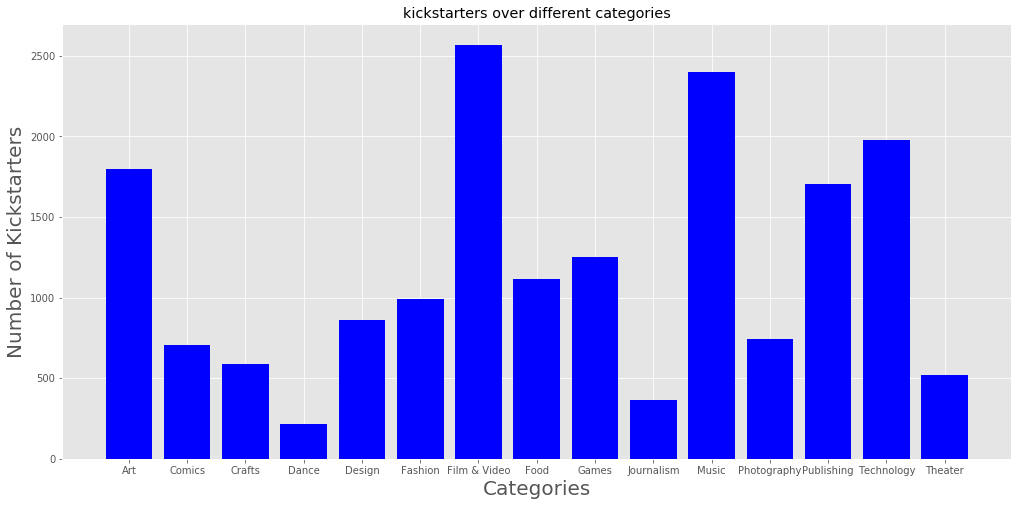

In [77]:
x_ = np.array(categories.iloc[:,0])
y_ = np.array(categories.iloc[:,1])
total = y_.sum()


#categories in numbers
fig,ax = plt.subplots(figsize=(17,8))
plt.bar(x_,y_, color = "blue")

plt.xlabel("Categories", fontsize=20) 
plt.ylabel("Number of Kickstarters", fontsize=20) 
plt.title("kickstarters over different categories")

In [78]:
# most popular sub categories
sub_categories = df.groupby(["parent category", "sub category"]).size()
sub_categories = sub_categories.reset_index(name= "sub_counts")
sub_categories.sort_values(["sub_counts"], ascending = False)



,parent category,sub category,sub_counts
39,Design,Product Design,425
85,Games,Tabletop Games,406
140,Technology,Hardware,284
50,Film & Video,Animation,277
42,Fashion,Apparel,275
...,...,...,...
93,Music,Chiptune,2
28,Crafts,Taxidermy,1
130,Publishing,Translations,1
125,Publishing,Literary Spaces,1


In [79]:
df.groupby(['parent category','state']).count()[["sub category"]].reset_index().sort_values(["sub category"], ascending=False)

,parent category,state,sub category
52,Music,successful,1589
32,Film & Video,successful,1491
62,Publishing,successful,1180
3,Art,successful,1037
65,Technology,failed,1006
...,...,...,...
16,Dance,live,3
18,Dance,suspended,2
23,Design,suspended,2
53,Music,suspended,1


In [80]:
categories_ = df.groupby(["parent category", "state"]).size().reset_index(name = "counts")
# categories_.sort_values(["counts"], ascending =False)
categories_

,parent category,state,counts
0,Art,canceled,85
1,Art,failed,643
2,Art,live,27
3,Art,successful,1037
4,Art,suspended,5
...,...,...,...
69,Theater,canceled,27
70,Theater,failed,131
71,Theater,live,5
72,Theater,successful,355


Text(0, 0.5, 'Number of Kickstarters')

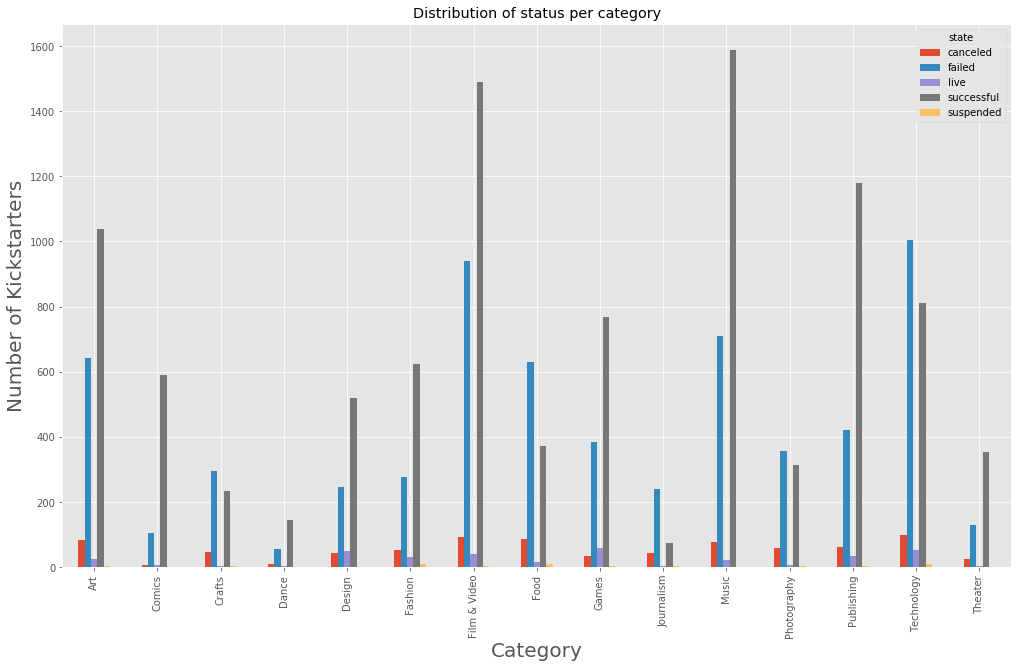

In [81]:
# number of failures and success per category
ax = categories_.pivot("parent category" , "state", "counts").plot(kind='bar', figsize=(17,10), title = "Distribution of status per category")

ax.set_xlabel("Category", fontsize=20)
ax.set_ylabel("Number of Kickstarters", fontsize=20)

In [82]:
#adding columns for time between creation and launch & lauch and deadline of each kickstarter

df ["created_to_launch"] = df["launched_at"] - df["created_at"]
df["launch_to_deadline"] = df["deadline"] - df["launched_at"]

/Users/shwetasharma1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/shwetasharma1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [83]:
# bifurcating database between successful and failed kickstarters
success_df = df[df["state"] == "successful"]
fail_df = df[df["state"] == "failed"]
fail_df.head()

,id,backers_count,category,country_displayable_name,location,created_at,launched_at,deadline,currency,pledged,goal,state,sub category,parent category,created_to_launch,launch_to_deadline
0,1432554512,6,"{""id"":312,""name"":""Restaurants"",""slug"":""food/re...",the United States,"{""id"":2471217,""name"":""Philadelphia"",""slug"":""ph...",2018-08-19,2018-12-05,2019-02-03,USD,266.0,75000.0,failed,Restaurants,Food,108 days,60 days
1,1925377347,2,"{""id"":33,""name"":""Webseries"",""slug"":""film & vid...",the United States,"{""id"":2442047,""name"":""Los Angeles"",""slug"":""los...",2016-11-29,2016-12-26,2017-01-25,USD,260.0,6000.0,failed,Webseries,Film & Video,27 days,30 days
2,1088749014,3,"{""id"":280,""name"":""Photobooks"",""slug"":""photogra...",the United States,"{""id"":150695,""name"":""Veracruz"",""slug"":""veracru...",2016-11-01,2016-11-02,2016-11-16,USD,185.0,1200.0,failed,Photobooks,Photography,1 days,14 days
3,1876427386,2,"{""id"":33,""name"":""Webseries"",""slug"":""film & vid...",the United States,"{""id"":2489314,""name"":""Savannah"",""slug"":""savann...",2018-01-22,2018-04-10,2018-05-10,USD,35.0,10000.0,failed,Webseries,Film & Video,78 days,30 days
4,671662806,8,"{""id"":301,""name"":""Science Fiction"",""slug"":""fil...",the United States,"{""id"":2490383,""name"":""Seattle"",""slug"":""seattle...",2019-04-07,2019-04-16,2019-05-16,USD,261.0,20000.0,failed,Science Fiction,Film & Video,9 days,30 days


In [84]:
# average time between created and launch 
success_df["created_to_launch"].mean()    #51 days
success_df["launch_to_deadline"].mean()   #31 days


Timedelta('31 days 02:42:56.097332')

In [55]:
df.head()

,id,backers_count,category,country_displayable_name,location,created_at,launched_at,deadline,currency,pledged,goal,state,sub category,parent category
0,1432554512,6,"{""id"":312,""name"":""Restaurants"",""slug"":""food/re...",the United States,"{""id"":2471217,""name"":""Philadelphia"",""slug"":""ph...",1534710982,1544052381,1549236381,USD,266.0,75000.0,failed,Restaurants,Food
1,1925377347,2,"{""id"":33,""name"":""Webseries"",""slug"":""film & vid...",the United States,"{""id"":2442047,""name"":""Los Angeles"",""slug"":""los...",1480480200,1482759921,1485351921,USD,260.0,6000.0,failed,Webseries,Film & Video
2,1088749014,3,"{""id"":280,""name"":""Photobooks"",""slug"":""photogra...",the United States,"{""id"":150695,""name"":""Veracruz"",""slug"":""veracru...",1478033617,1478089224,1479302424,USD,185.0,1200.0,failed,Photobooks,Photography
3,1876427386,2,"{""id"":33,""name"":""Webseries"",""slug"":""film & vid...",the United States,"{""id"":2489314,""name"":""Savannah"",""slug"":""savann...",1516675034,1523385196,1525977196,USD,35.0,10000.0,failed,Webseries,Film & Video
4,671662806,8,"{""id"":301,""name"":""Science Fiction"",""slug"":""fil...",the United States,"{""id"":2490383,""name"":""Seattle"",""slug"":""seattle...",1554695036,1555464215,1558056215,USD,261.0,20000.0,failed,Science Fiction,Film & Video


In [85]:
date_cols = ['deadline','launched_at', 'created_at']
# Create new columns for weekday
def get_weekday(value):
    return value.strftime('%A')
    
for col in date_cols:
    col_name = col + "_weekday"
    df[col_name] = df[col].apply(get_weekday)

df['deadline_weekday'].head()

/Users/shwetasharma1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0       Sunday
1    Wednesday
2    Wednesday
3     Thursday
4     Thursday
Name: deadline_weekday, dtype: object

In [86]:
df.head()

,id,backers_count,category,country_displayable_name,location,created_at,launched_at,deadline,currency,pledged,goal,state,sub category,parent category,created_to_launch,launch_to_deadline,deadline_weekday,launched_at_weekday,created_at_weekday
0,1432554512,6,"{""id"":312,""name"":""Restaurants"",""slug"":""food/re...",the United States,"{""id"":2471217,""name"":""Philadelphia"",""slug"":""ph...",2018-08-19,2018-12-05,2019-02-03,USD,266.0,75000.0,failed,Restaurants,Food,108 days,60 days,Sunday,Wednesday,Sunday
1,1925377347,2,"{""id"":33,""name"":""Webseries"",""slug"":""film & vid...",the United States,"{""id"":2442047,""name"":""Los Angeles"",""slug"":""los...",2016-11-29,2016-12-26,2017-01-25,USD,260.0,6000.0,failed,Webseries,Film & Video,27 days,30 days,Wednesday,Monday,Tuesday
2,1088749014,3,"{""id"":280,""name"":""Photobooks"",""slug"":""photogra...",the United States,"{""id"":150695,""name"":""Veracruz"",""slug"":""veracru...",2016-11-01,2016-11-02,2016-11-16,USD,185.0,1200.0,failed,Photobooks,Photography,1 days,14 days,Wednesday,Wednesday,Tuesday
3,1876427386,2,"{""id"":33,""name"":""Webseries"",""slug"":""film & vid...",the United States,"{""id"":2489314,""name"":""Savannah"",""slug"":""savann...",2018-01-22,2018-04-10,2018-05-10,USD,35.0,10000.0,failed,Webseries,Film & Video,78 days,30 days,Thursday,Tuesday,Monday
4,671662806,8,"{""id"":301,""name"":""Science Fiction"",""slug"":""fil...",the United States,"{""id"":2490383,""name"":""Seattle"",""slug"":""seattle...",2019-04-07,2019-04-16,2019-05-16,USD,261.0,20000.0,failed,Science Fiction,Film & Video,9 days,30 days,Thursday,Tuesday,Sunday


In [87]:
# average time between launch and deadline

fail_df["created_to_launch"].mean()    #42 days
fail_df["launch_to_deadline"].mean()   #35 days


Timedelta('35 days 02:44:51.901954')

In [88]:
df.head()

,id,backers_count,category,country_displayable_name,location,created_at,launched_at,deadline,currency,pledged,goal,state,sub category,parent category,created_to_launch,launch_to_deadline,deadline_weekday,launched_at_weekday,created_at_weekday
0,1432554512,6,"{""id"":312,""name"":""Restaurants"",""slug"":""food/re...",the United States,"{""id"":2471217,""name"":""Philadelphia"",""slug"":""ph...",2018-08-19,2018-12-05,2019-02-03,USD,266.0,75000.0,failed,Restaurants,Food,108 days,60 days,Sunday,Wednesday,Sunday
1,1925377347,2,"{""id"":33,""name"":""Webseries"",""slug"":""film & vid...",the United States,"{""id"":2442047,""name"":""Los Angeles"",""slug"":""los...",2016-11-29,2016-12-26,2017-01-25,USD,260.0,6000.0,failed,Webseries,Film & Video,27 days,30 days,Wednesday,Monday,Tuesday
2,1088749014,3,"{""id"":280,""name"":""Photobooks"",""slug"":""photogra...",the United States,"{""id"":150695,""name"":""Veracruz"",""slug"":""veracru...",2016-11-01,2016-11-02,2016-11-16,USD,185.0,1200.0,failed,Photobooks,Photography,1 days,14 days,Wednesday,Wednesday,Tuesday
3,1876427386,2,"{""id"":33,""name"":""Webseries"",""slug"":""film & vid...",the United States,"{""id"":2489314,""name"":""Savannah"",""slug"":""savann...",2018-01-22,2018-04-10,2018-05-10,USD,35.0,10000.0,failed,Webseries,Film & Video,78 days,30 days,Thursday,Tuesday,Monday
4,671662806,8,"{""id"":301,""name"":""Science Fiction"",""slug"":""fil...",the United States,"{""id"":2490383,""name"":""Seattle"",""slug"":""seattle...",2019-04-07,2019-04-16,2019-05-16,USD,261.0,20000.0,failed,Science Fiction,Film & Video,9 days,30 days,Thursday,Tuesday,Sunday


In [89]:
def get_month(value):
    return value.month

def get_day(value):
    return value.day

def get_yr(value):
    return value.year

for col in date_cols:
    col_month = col + "_month"
    df[col_month] = df[col].apply(get_month)
    col_day = col + "_day"
    df[col_day] = df[col].apply(get_day)
    col_yr = col + "_yr"
    df[col_yr] = df[col].apply(get_yr)
   

df.head()

/Users/shwetasharma1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/Users/shwetasharma1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/shwetasharma1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

,id,backers_count,category,country_displayable_name,location,created_at,launched_at,deadline,currency,pledged,...,created_at_weekday,deadline_month,deadline_day,deadline_yr,launched_at_month,launched_at_day,launched_at_yr,created_at_month,created_at_day,created_at_yr
0,1432554512,6,"{""id"":312,""name"":""Restaurants"",""slug"":""food/re...",the United States,"{""id"":2471217,""name"":""Philadelphia"",""slug"":""ph...",2018-08-19,2018-12-05,2019-02-03,USD,266.0,...,Sunday,2,3,2019,12,5,2018,8,19,2018
1,1925377347,2,"{""id"":33,""name"":""Webseries"",""slug"":""film & vid...",the United States,"{""id"":2442047,""name"":""Los Angeles"",""slug"":""los...",2016-11-29,2016-12-26,2017-01-25,USD,260.0,...,Tuesday,1,25,2017,12,26,2016,11,29,2016
2,1088749014,3,"{""id"":280,""name"":""Photobooks"",""slug"":""photogra...",the United States,"{""id"":150695,""name"":""Veracruz"",""slug"":""veracru...",2016-11-01,2016-11-02,2016-11-16,USD,185.0,...,Tuesday,11,16,2016,11,2,2016,11,1,2016
3,1876427386,2,"{""id"":33,""name"":""Webseries"",""slug"":""film & vid...",the United States,"{""id"":2489314,""name"":""Savannah"",""slug"":""savann...",2018-01-22,2018-04-10,2018-05-10,USD,35.0,...,Monday,5,10,2018,4,10,2018,1,22,2018
4,671662806,8,"{""id"":301,""name"":""Science Fiction"",""slug"":""fil...",the United States,"{""id"":2490383,""name"":""Seattle"",""slug"":""seattle...",2019-04-07,2019-04-16,2019-05-16,USD,261.0,...,Sunday,5,16,2019,4,16,2019,4,7,2019


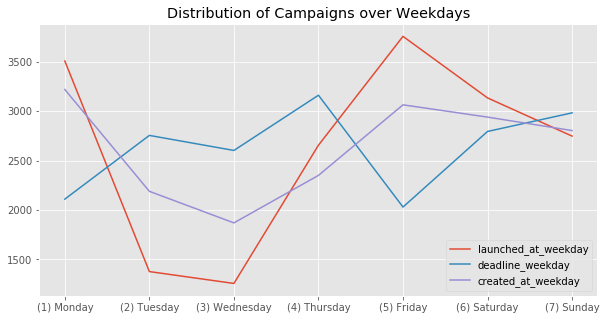

In [29]:
plot_df = pd.concat([df['launched_at_weekday'].value_counts(),
                     df['deadline_weekday'].value_counts(),
                    df['created_at_weekday'].value_counts()], axis=1)
plot_df.index = ["(5) Friday","(1) Monday","(6) Saturday","(7) Sunday","(4) Thursday","(2) Tuesday","(3) Wednesday"]
plot_df = plot_df.sort_index()
plot_df.plot(kind='line', figsize=(10,5), title = "Distribution of Campaigns over Weekdays")

Text(0, 0.5, 'Number of Kickstarters')

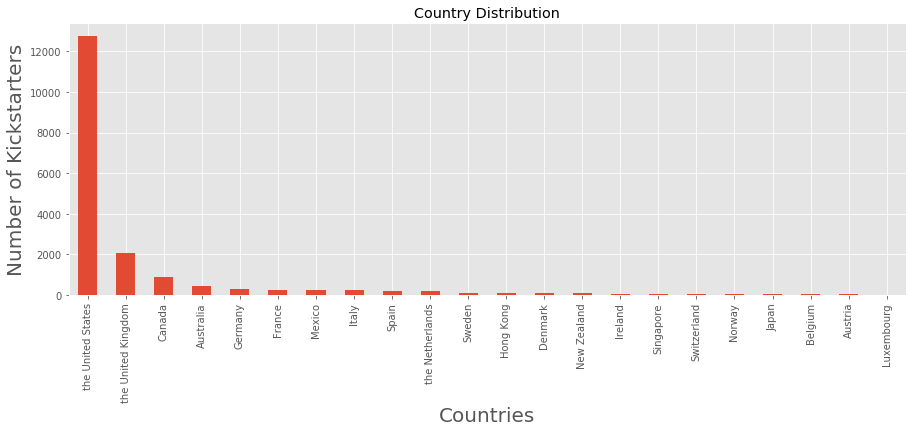

In [92]:
ax = df['country_displayable_name'].value_counts().plot(kind = 'bar', title = 'Country Distribution', figsize=(15,5))
ax.set_xlabel("Countries", fontsize=20)
ax.set_ylabel("Number of Kickstarters", fontsize=20)

In [93]:
# ax = df['currency'].value_counts().plot(kind = 'bar', title = 'Currency Distribution', figsize=(15,5))
# ax.set_xlabel("Currencies", fontsize=20)
# ax.set_ylabel("Number of Kickstarters", fontsize=20)

In [94]:
# average goal amount

success_df["goal"].mean()    #13000
fail_df["goal"].mean()       #113500

113493.52699193299

In [95]:
#average backers count

success_df["backers_count"].mean()   #257
fail_df["backers_count"].mean()      #11

11.577412348743406

In [96]:
US_df = df[df["country_displayable_name"] == "the United States"]
US_df.head(5)


,id,backers_count,category,country_displayable_name,location,created_at,launched_at,deadline,currency,pledged,...,created_at_weekday,deadline_month,deadline_day,deadline_yr,launched_at_month,launched_at_day,launched_at_yr,created_at_month,created_at_day,created_at_yr
0,1432554512,6,"{""id"":312,""name"":""Restaurants"",""slug"":""food/re...",the United States,"{""id"":2471217,""name"":""Philadelphia"",""slug"":""ph...",2018-08-19,2018-12-05,2019-02-03,USD,266.0,...,Sunday,2,3,2019,12,5,2018,8,19,2018
1,1925377347,2,"{""id"":33,""name"":""Webseries"",""slug"":""film & vid...",the United States,"{""id"":2442047,""name"":""Los Angeles"",""slug"":""los...",2016-11-29,2016-12-26,2017-01-25,USD,260.0,...,Tuesday,1,25,2017,12,26,2016,11,29,2016
2,1088749014,3,"{""id"":280,""name"":""Photobooks"",""slug"":""photogra...",the United States,"{""id"":150695,""name"":""Veracruz"",""slug"":""veracru...",2016-11-01,2016-11-02,2016-11-16,USD,185.0,...,Tuesday,11,16,2016,11,2,2016,11,1,2016
3,1876427386,2,"{""id"":33,""name"":""Webseries"",""slug"":""film & vid...",the United States,"{""id"":2489314,""name"":""Savannah"",""slug"":""savann...",2018-01-22,2018-04-10,2018-05-10,USD,35.0,...,Monday,5,10,2018,4,10,2018,1,22,2018
4,671662806,8,"{""id"":301,""name"":""Science Fiction"",""slug"":""fil...",the United States,"{""id"":2490383,""name"":""Seattle"",""slug"":""seattle...",2019-04-07,2019-04-16,2019-05-16,USD,261.0,...,Sunday,5,16,2019,4,16,2019,4,7,2019


In [97]:
json.loads(US_df.iloc[440]["location"])

{'id': 2388929,
 'name': 'Dallas',
 'slug': 'dallas-tx',
 'short_name': 'Dallas, TX',
 'displayable_name': 'Dallas, TX',
 'localized_name': 'Dallas',
 'country': 'US',
 'state': 'TX',
 'type': 'Town',
 'is_root': False,
 'expanded_country': 'United States',
 'urls': {'web': {'discover': 'https://www.kickstarter.com/discover/places/dallas-tx',
   'location': 'https://www.kickstarter.com/locations/dallas-tx'},
  'api': {'nearby_projects': 'https://api.kickstarter.com/v1/discover?signature=1579202081.e04e6494a69de59060f6fd3efa00881d0fc40b54&woe_id=2388929'}}}

In [98]:
# getting rid of rows which do not have location information
US_data = US_df[US_df["location"].notnull()]

In [99]:
US_data["US_city"] = US_data["location"].apply(lambda x: json.loads(x)['localized_name'])
US_data["US_state"] = US_data["location"].apply(lambda x: json.loads(x)['state'])

/Users/shwetasharma1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/shwetasharma1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [100]:
# after getting rid of location nans I am left with 12719 rows for US 

In [101]:
US_success = US_data[US_data["state"] == "successful"]
US_fail = US_data[US_data["state"] == "failed"]

Text(0.5, 1.0, 'Number of kickstarters according to different status')

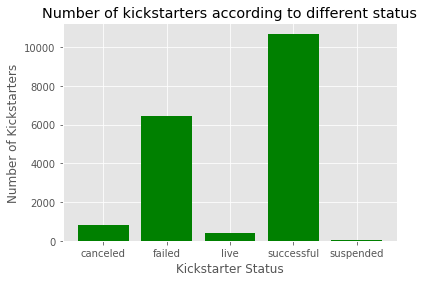

In [102]:
US_data.groupby("state").size().reset_index(name= "counts")

x = np.array(a.iloc[:,0])
y = np.array(a.iloc[:,1])
total = y.sum()
y/total
#status in numbers within US
plt.bar(x, y , color = "green")

plt.xlabel("Kickstarter Status") 
plt.ylabel("Number of Kickstarters") 
plt.title("Number of kickstarters according to different status")

In [103]:
US_success["backers_count"].mean()     #264.84349324145245
US_fail["backers_count"].mean()        #11.32295719844358
US_data.columns

Index(['id', 'backers_count', 'category', 'country_displayable_name',
       'location', 'created_at', 'launched_at', 'deadline', 'currency',
       'pledged', 'goal', 'state', 'sub category', 'parent category',
       'created_to_launch', 'launch_to_deadline', 'deadline_weekday',
       'launched_at_weekday', 'created_at_weekday', 'deadline_month',
       'deadline_day', 'deadline_yr', 'launched_at_month', 'launched_at_day',
       'launched_at_yr', 'created_at_month', 'created_at_day', 'created_at_yr',
       'US_city', 'US_state'],
      dtype='object')

In [105]:
# top 5 states with most successful kickstarters 
US_states = US_data.groupby(["US_state", "state"]).size().reset_index(name = "counts")
success_states = US_states[US_states["state"] == "successful"].sort_values(["counts"], ascending =False)
fail_states = US_states[US_states["state"] == "failed"].sort_values(["counts"], ascending =False)



Text(0.5, 1.0, 'Number of successful kickstarters US states')

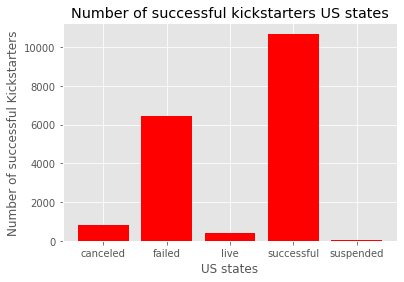

In [106]:
# absolute number of successes in top 5 US states
plt.bar(x[:5], y[:5] , color = "red")
plt.xlabel("US states") 
plt.ylabel("Number of successful Kickstarters") 
plt.title("Number of successful kickstarters US states")

In [110]:
states = US_data.groupby(["US_state", "state"]).size().reset_index(name = "counts").sort_values(["counts"], ascending =False)
plot_states = states[states["US_state"].isin(["CA", "NY","TX", "WA","IL"])]

# # number of failures and success per state
# ax = plot_states.pivot("US_state" , "state", "counts").plot(kind='bar', figsize=(17,10), title = "Distribution of status per category")

# ax.set_xlabel("Category", fontsize=20)
# ax.set_ylabel("Number of Kickstarters", fontsize=20)

In [111]:

selected_states = plot_states.groupby(['US_state', 'state']).agg({'counts': 'sum'})
# Change: groupby state_office and divide by sum
state_pcts = selected_states.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))

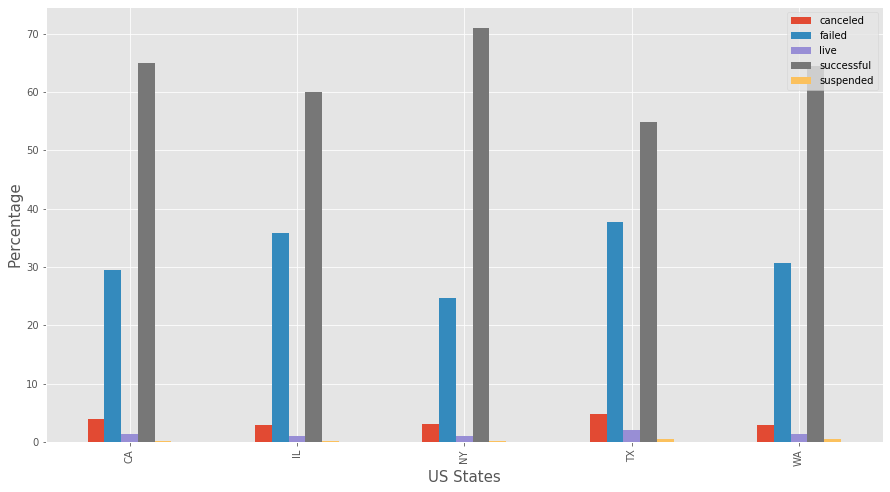

In [112]:
# success in percentages of top 5 US states

ax= state_pcts.unstack(level=1).plot(kind='bar', subplots=False, figsize=(15,8))
ax.set_xlabel("US States", fontsize = 15)
ax.set_ylabel("Percentage", fontsize = 15)

ax.legend(["canceled", "failed", "live", "successful", "suspended"] )


In [231]:
plot_categories = US_data[US_data["US_state"].isin(["CA", "NY","TX"]) & US_data["parent category"].isin(["Film & Video", "Music","Technology","Art","Publishing",
"Games","Food"])]

state_categories = plot_categories.groupby(["US_state","parent category", "state"]).size().reset_index(name = "count")

#number of status per category per state
state_cat_agg = state_categories.groupby(['US_state',"parent category", 'state']).agg({'count': 'sum'})

In [232]:
# percentage of categories per US_state
state_cat_pcts = state_cat_agg.groupby(level=[0,1]).apply(lambda x:
                                                 100 * x / float(x.sum()))

In [254]:
state_cat_pcts[:50]


count
US_state parent category state                
CA       Art             canceled     6.132075
                         failed      29.716981
                         live         0.471698
                         successful  63.207547
                         suspended    0.471698
         Film & Video    canceled     3.549061
                         failed      31.524008
                         live         0.626305
                         successful  64.091858
                         suspended    0.208768
         Food            canceled     6.603774
                         failed      50.000000
                         successful  43.396226
         Games           canceled     4.201681
                         failed      29.411765
                         live         3.361345
                         successful  63.025210
         Music           canceled     3.040541
                         failed      29.729730
                         live         0.675676
                         successful  66.554054
         Publishing      canceled     3.488372
                         failed      22.674419
                         successful  73.255814
                         suspended    0.581395
         Technology      canceled     3.942652
                         failed      35.483871
                         live         2.150538
                         successful  58.064516
                         suspended    0.358423
NY       Art             canceled     2.343750
                         failed      25.781250
                         successful  71.875000
         Film & Video    canceled     3.200000
                         failed      21.600000
                         live         1.600000
                         successful  73.600000
         Food            canceled    10.666667
                         failed      44.000000
                         live         1.333333
                         successful  44.000000
         Games           canceled     2.000000
                         failed      30.000000
                         live         4.000000
                         successful  64.000000
         Music           canceled     1.746725
                         failed      19.213974
                         live         0.436681
                         successful  78.602620
         Publishing      canceled     3.846154

In [251]:
# ax= state_cat_pcts.unstack(level=[1,2]).plot(kind='bar', subplots=False, figsize=(15,8))
# ax.set_xlabel("US States", fontsize = 15)
# # ax.set_ylabel("Percentage", fontsize = 15)
# import seaborn
# seaborn.set(style='ticks')
# state= ('CA', 'NY', 'TX')
# groups = ("Film & Video", "Music","Technology","Art","Publishing",
# "Games","Food")
# status = ("successful", "failed")
# index = pd.MultiIndex.from_product(
#     [groups, state, status], 
#    names=['Group', 'State', 'Status']
# )
# values = state_cat_pcts["count"]

# data = pd.DataFrame(data={'val': state_cat_pcts["count"]}, index=index).reset_index()
# print(data)


US_state  parent category  state     
CA        Art              canceled       6.132075
                           failed        29.716981
                           live           0.471698
                           successful    63.207547
                           suspended      0.471698
                                           ...    
TX        Publishing       successful    61.538462
          Technology       canceled       9.090909
                           failed        40.909091
                           live           4.545455
                           successful    45.454545
Name: count, Length: 86, dtype: float64